# Penguins Classification
using KNN model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [64]:
penguin_df=pd.read_csv('penguins_size.csv')
penguin_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [65]:
penguin_df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [66]:
penguin_df=penguin_df.dropna().reset_index(drop=True)

In [67]:
penguin_df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [77]:
penguin_df['species'].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

In [76]:
penguin_df['sex'].replace(to_replace=['MALE','FEMALE'],value=[0,1],inplace=True)
penguin_df['island'].replace(to_replace=['Biscoe','Dream','Torgersen'],value=[0,1,2],inplace=True)
penguin_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,0
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
3,Adelie,2,36.7,19.3,193.0,3450.0,1
4,Adelie,2,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
329,Gentoo,0,47.2,13.7,214.0,4925.0,1
330,Gentoo,0,46.8,14.3,215.0,4850.0,1
331,Gentoo,0,50.4,15.7,222.0,5750.0,0
332,Gentoo,0,45.2,14.8,212.0,5200.0,1


C:\Users\imvee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


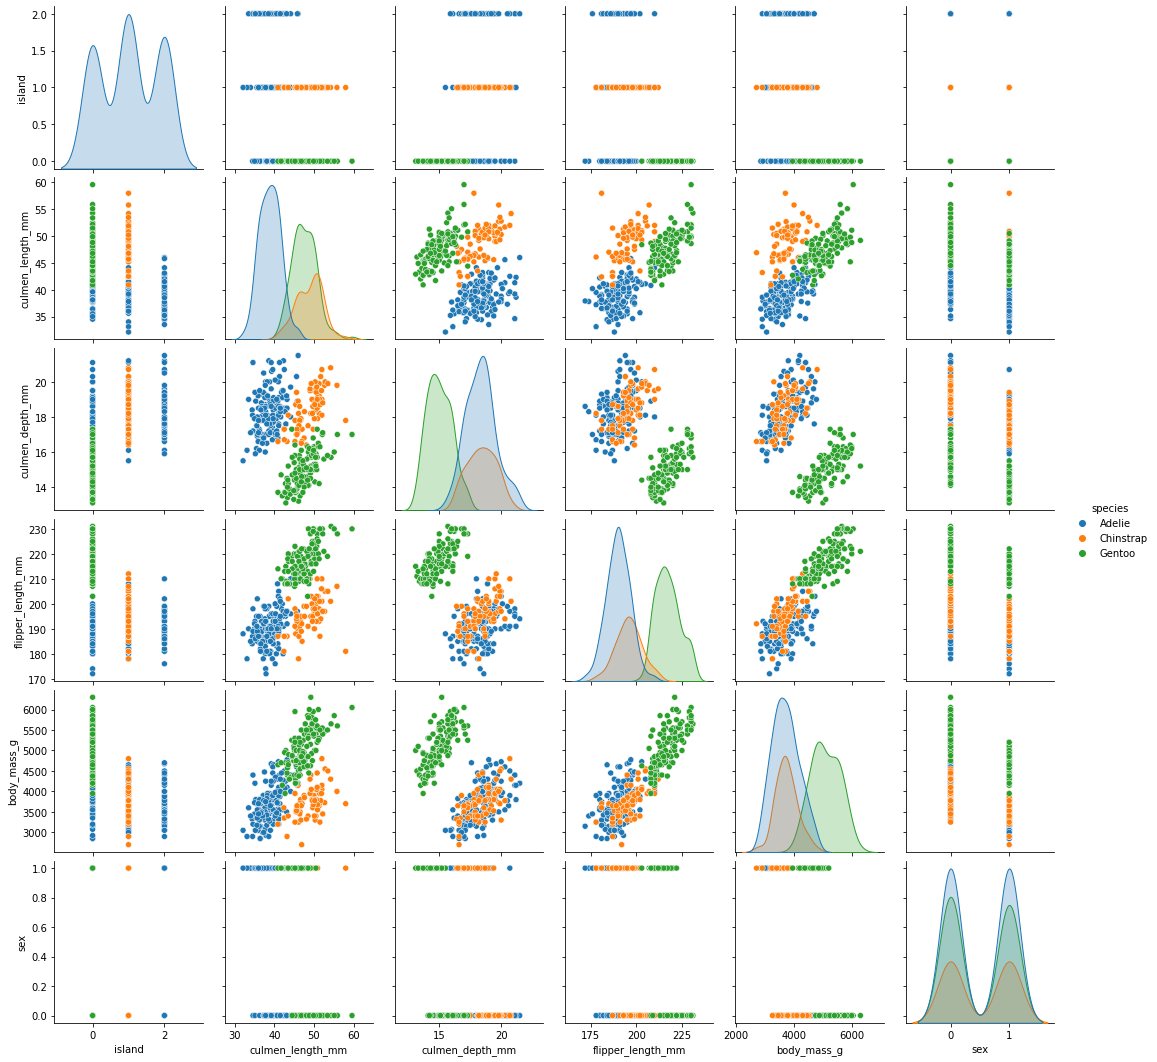

In [78]:
import seaborn as sns
sns.pairplot(penguin_df,hue='species')

In [79]:
penguin_df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [82]:
X=penguin_df[['island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex']].values
X[0:5]

array([[2.00e+00, 3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 0.00e+00],
       [2.00e+00, 3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00],
       [2.00e+00, 4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00],
       [2.00e+00, 3.67e+01, 1.93e+01, 1.93e+02, 3.45e+03, 1.00e+00],
       [2.00e+00, 3.93e+01, 2.06e+01, 1.90e+02, 3.65e+03, 0.00e+00]])

In [85]:
y=penguin_df['species'].values
y[0:5]

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

In [84]:
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print(f'Train Set: {X_train.shape,y_train.shape}')
print(f' Test Set: {X_test.shape,y_test.shape}')

Train Set: ((267, 6), (267,))
 Test Set: ((67, 6), (67,))


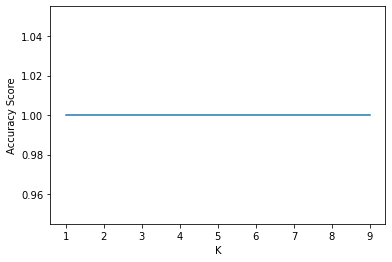

The best accuracy 1.0 is achieved at K = 1


In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Ks=10

mean_acc=np.zeros((Ks-1))

for n in range(1,Ks):
    knn=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_hat=knn.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_hat,y_test)

plt.plot(range(1,Ks),mean_acc)
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.show()

print(f'The best accuracy {mean_acc.max()} is achieved at K = {mean_acc.argmax()+1}')

In [94]:
best_k=mean_acc.argmax()+1
knn=KNeighborsClassifier(n_neighbors=best_k).fit(X_train,y_train)
y_hat=knn.predict(X_test)

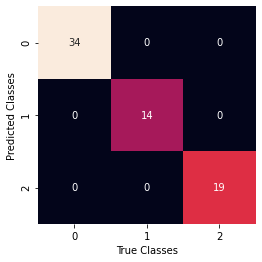

In [95]:
from sklearn.metrics import confusion_matrix

conf_mat=confusion_matrix(y_hat,y_test)
sns.heatmap(conf_mat.T,annot=True,cbar=False,square=True)
plt.xlabel('True Classes')
plt.ylabel('Predicted Classes')
plt.show()